<a href="https://colab.research.google.com/github/ziedjouini/new_projet/blob/main/W5_MA_Ensemble_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicing ensemble learning**
Download the following [Spotify dataset](https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip).

Execute the following tasks:
* Build a classification or regression model with this dataset
* Evaluate the performance of your  model using accuracy score, RMSE or R_squared
* Apply 3 ensemble techniques of your choice on the dataset
* Compare the obtained results with your individual model


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)


In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [ ]:
df['duration_minutes']=df['duration_ms']/1000/60

In [ ]:
df.info()
# pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
df.corr()

<ipython-input-66-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_minutes
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,0.002348
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011203
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125781
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,1.000000
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030550
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076021
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023783
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047618
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016171
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028456


In [ ]:
def hist_boxplot(df):
    num_cols = len(df.columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols*3))
    for i, col in enumerate(df.columns):
      ax1 = axes[i, 0]
      ax2 = axes[i, 1]
      ax1.hist(df[col])
      ax1.set_title(col + ' histogram')

      ax2.boxplot(df[col])
      ax2.set_title(col + ' boxplot')

    plt.tight_layout()
    plt.show()


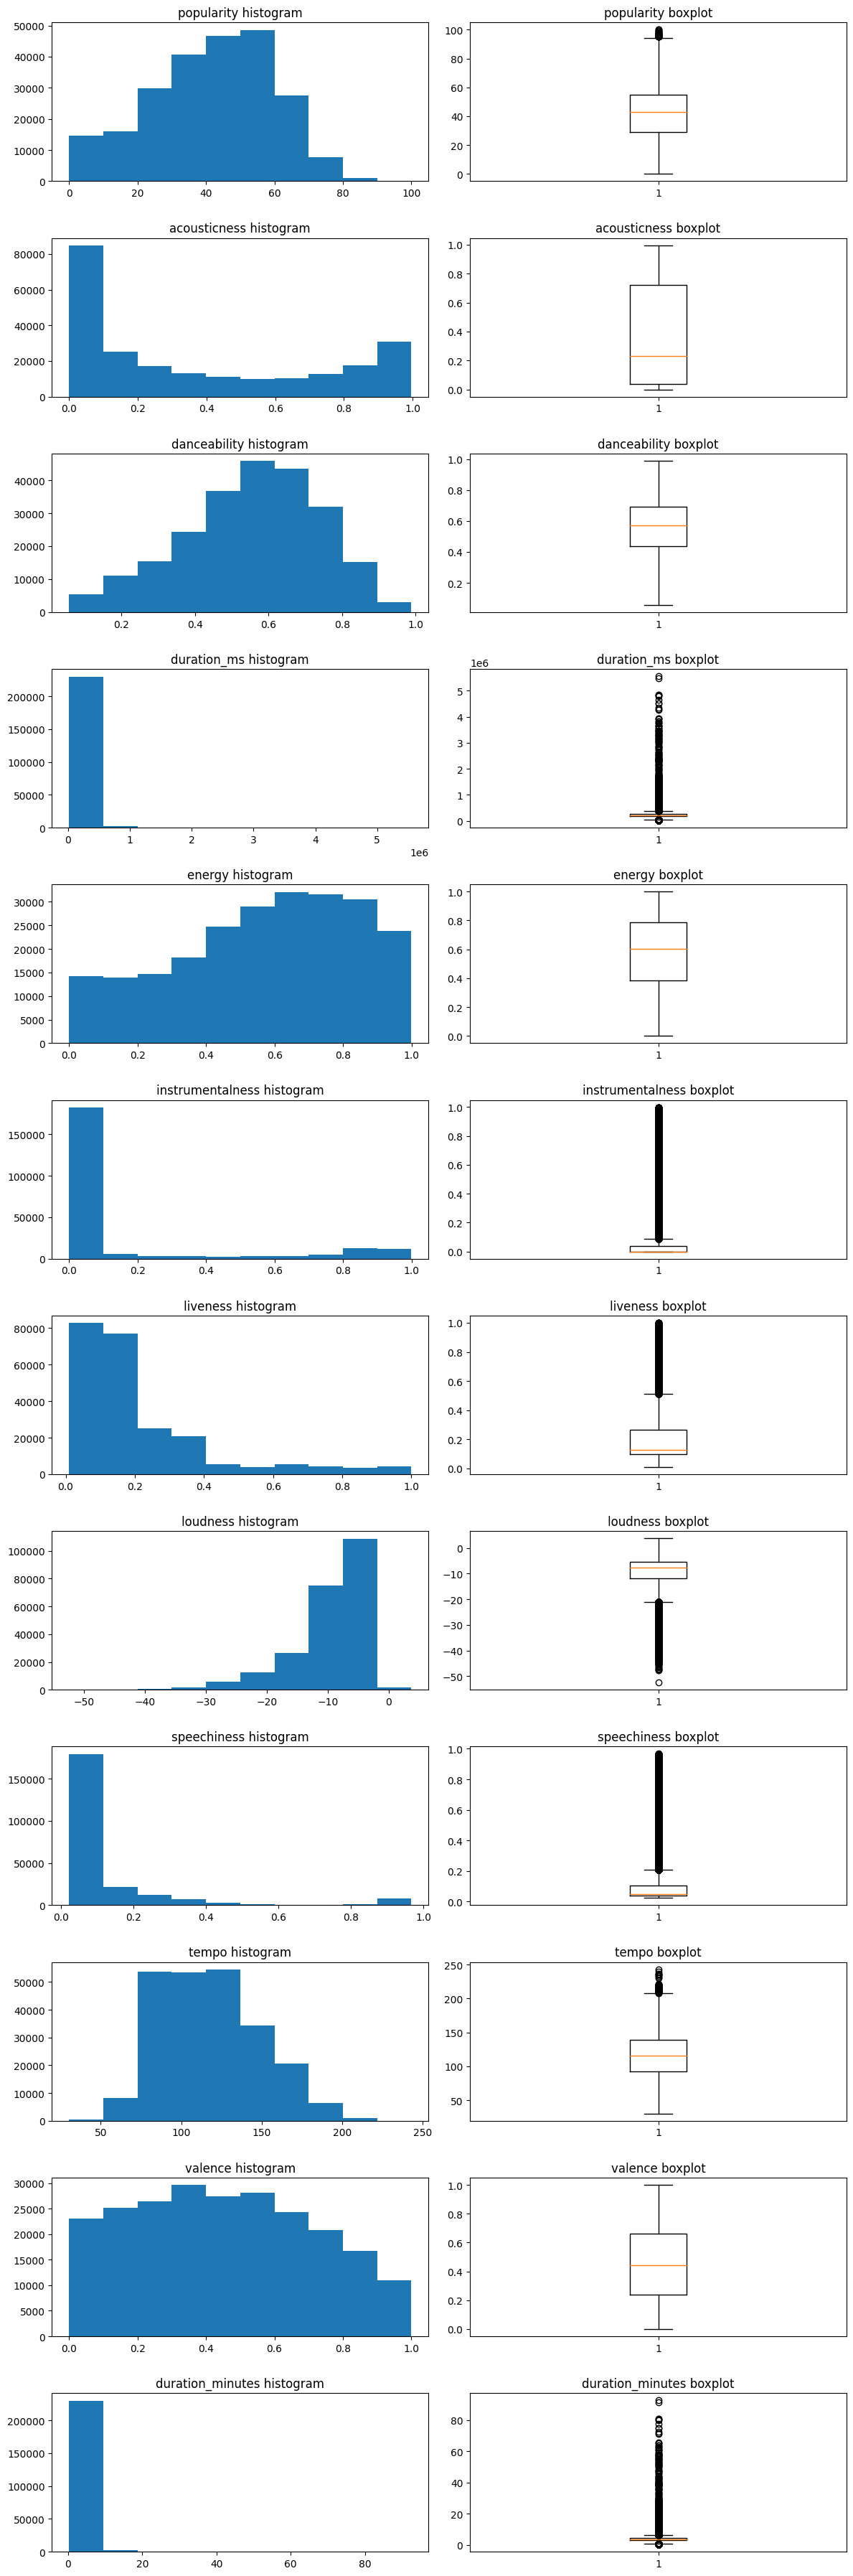

In [ ]:
# distributions & présence d'outliers
hist_boxplot(df.select_dtypes(include='number'))

In [ ]:
X = df.drop(columns=['artist_name', 'track_name', 'track_id', 'duration_ms', 'mode'])
y = df['mode']

In [ ]:
X.select_dtypes(include='object').columns

Index(['genre', 'key', 'time_signature'], dtype='object')

In [ ]:
X_scaled = pd.DataFrame()

col_num_scale_robust = ['loudness', 'duration_minutes']
col_num_scale_standard = ['popularity', 'tempo']
col_num_no_scale = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
col_categorielles = ['genre', 'key', 'time_signature']

robust = RobustScaler()
stand = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_scaled[col_num_scale_robust]=robust.fit_transform(X[col_num_scale_robust])
X_scaled[col_num_scale_standard]=stand.fit_transform(X[col_num_scale_standard])
X_scaled[col_num_no_scale]=X[col_num_no_scale]
encoder.fit(X[col_categorielles])
X_scaled[encoder.get_feature_names_out()]=encoder.transform(X[col_categorielles])


In [ ]:
X_scaled.head()

,loudness,duration_minutes,popularity,tempo,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,-1.828,-1.460048,-2.261007,1.595607,0.611,0.389,0.910,0.000,0.3460,0.0525,0.814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-5.559,-1.001725,-2.206031,1.823253,0.246,0.590,0.737,0.000,0.1510,0.0868,0.816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-13.879,-0.604986,-2.096080,-0.588326,0.952,0.663,0.131,0.000,0.1030,0.0362,0.368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-12.178,-0.820157,-2.261007,1.750597,0.703,0.240,0.326,0.000,0.0985,0.0395,0.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-21.150,-1.662047,-2.041104,0.741433,0.950,0.331,0.225,0.123,0.2020,0.0456,0.390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


target = mode (Minor ou Major)

In [ ]:
y.value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, stratify=y, train_size=0.8)

In [ ]:
# Régression logistique simple
model = LogisticRegression()
model.fit(X_train, y_train)
'train score', model.score(X_train, y_train), 'test score', model.score(X_test, y_test)

('train score', 0.6926522719948437, 'test score', 0.6952411644644967)

In [ ]:
# 1ère technique : hard voting

clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression()
clf_3 = DecisionTreeClassifier()

voting_ens = VotingClassifier(estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

for clf in (clf_1, clf_2, clf_3, voting_ens):
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6694381781072081
LogisticRegression 0.6952411644644967
DecisionTreeClassifier 0.7272317112471801
VotingClassifier 0.7245461381458803


In [ ]:
# 1ère technique + efficace qu'une régression logistique seule mais pas forcément plus qu'un decision tree

In [ ]:
# 2e technique : stacking, on reprend les mêmes algos que pour la 1ère technique
# le stacking classifier utilisé est celui de sklearn, et non de mlxtend. les noms des hyper paramètres changent mais pas le fonctionnement

clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression()
clf_3 = DecisionTreeClassifier()

clf_final = LogisticRegression()

clf_stack = StackingClassifier(
estimators=[('kn', clf_1), ('lr', clf_2), ('dt', clf_3)], final_estimator=clf_final, passthrough=False)

classifiers=[clf_1, clf_2, clf_3, clf_final, clf_stack]

for clf in classifiers:
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6694381781072081
LogisticRegression 0.6952411644644967
DecisionTreeClassifier 0.7277473412826297
LogisticRegression 0.6952411644644967
StackingClassifier 0.7437963261359974


In [ ]:
# 3e technique : bagging

base_model = DecisionTreeClassifier(max_depth=3)

clf_bagging = BaggingClassifier(base_estimator=base_model, n_estimators=1000, oob_score=True)
clf_bagging.fit(X_train, y_train)

print("oob_score_: ", clf_bagging.oob_score_)
pred = clf_bagging.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, pred))

oob_score_:  0.6627135030615533
accuracy_score:  0.661832635084327


Résultats : le stacking a la meilleure accuracy  
La technique de bagging est un peu décevante mais le résultat n'est finalement pas étonnant  
Autres pistes : tester le boosting, changer les paramètres du stacking, etc...